<div class="output_png output_subarea output_execute_result">
<center>
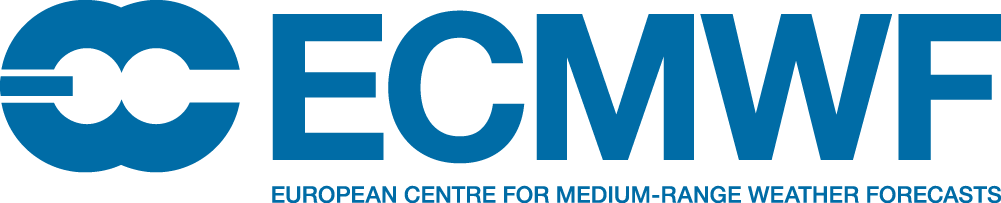
</div>

# 	2m temperature 

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://charts.ecmwf.int/products/medium-2t-wind  

This is the adapted notebook that plots only temperature using user defined colours

<div class="output_png output_subarea output_execute_result">
<center>
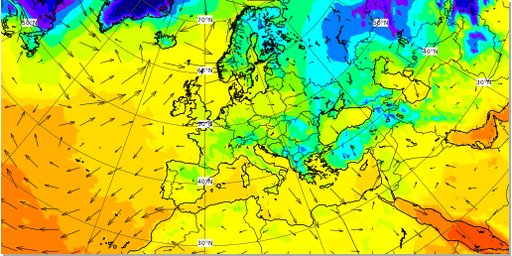</center>
</div>

The full list of available Open data products can be found [here](https://www.ecmwf.int/en/forecasts/datasets/open-data), and more information can be found in the [User documentation](https://confluence.ecmwf.int/display/DAC/ECMWF+open+data%3A+real-time+forecasts+from+IFS+and+AIFS).  

Access to ECMWF Open data is governed by the Creative Commons CC-BY-4.0 licence and associated [Terms of Use](https://apps.ecmwf.int/datasets/licences/general/).  

<sub> In applying this licence, ECMWF does not waive the privileges and immunities granted to it by virtue of its status as an intergovernmental organisation nor does it submit to any jurisdiction </sub>

To find out how to obtain the access to the full forecast dataset at higher resolution please visit our [Access page](https://www.ecmwf.int/en/forecasts/accessing-forecasts).

## Retrieve Data
This product takes in input 1 parameter:

* [2 metre temperature](https://codes.ecmwf.int/grib/param-db/167)

In this example, we will use: 
- [**ecmwf.opendata**](https://github.com/ecmwf/ecmwf-opendata) Client to download the data
- [**Metview**](https://metview.readthedocs.io/en/latest/) library to read, process and plot the data 

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> If you are running the notebook on MyBinder or already have the libraries installed, go directly to importing the libraries.
</div>
<div class="alert alert-block alert-info">
<b>Note:</b> If you don't have these libraries installed, click on three dots below, uncomment the code and run the next cell.
</div>

In [1]:
#!pip install ecmwf-opendata metview metview-python

In [40]:
import metview as mv
from ecmwf.opendata import Client
from datetime import datetime

In [41]:
client = Client("ecmwf", beta=False)

In [42]:
parameters = '2t'

In [44]:
# Get the current date and hour
now = datetime.now()
formatted_date = now.strftime("%Y-%m-%d_%Hh")
path = './'
filename_o = f"{path}medium-2t{formatted_date}.grib"
filename_o

'./medium-2t2025-02-28_13h.grib'

Setting date to 0 will download today's data. 
Removing date and time altogether from the request will download the latest data.  
Try commenting out date and time to download latest forecast!

In [4]:
client.retrieve(
    date=0,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="sfc",
    param=parameters,
    target=filename_o
)

20250228000000-12h-oper-fc.grib2:   0%|          | 0.00/3.28M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **Metview's read() function** to read the files.

In [5]:
data = mv.read(filename_o)

The **describe()** function will give us the overview of the dataset.  

In [6]:
data.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
10u,heightAboveGround,10,20250228,0,12,None,165,od,oper,fc,0001
10v,heightAboveGround,10,20250228,0,12,None,166,od,oper,fc,0001
2t,heightAboveGround,2,20250228,0,12,None,167,od,oper,fc,0001
mn2t3,heightAboveGround,2,20250228,0,12,None,228027,od,oper,fc,0001
mx2t3,heightAboveGround,2,20250228,0,12,None,228026,od,oper,fc,0001


And an overview of one parameter, where we can see more information, such as units or type of level.

In [7]:
data.describe('2t')

shortName,2t
name,2 metre temperature
paramId,167
units,K
typeOfLevel,heightAboveGround
level,2
date,20250228
time,0
step,12
number,None
class,od


We can use **ls()** function to list all the fields in the file we downloaded.

In [8]:
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,mx2t3,heightAboveGround,2,20250228,0,9-12,fc,None,regular_ll
1,ecmf,mn2t3,heightAboveGround,2,20250228,0,9-12,fc,None,regular_ll
2,ecmf,10u,heightAboveGround,10,20250228,0,12,fc,None,regular_ll
3,ecmf,10v,heightAboveGround,10,20250228,0,12,fc,None,regular_ll
4,ecmf,2t,heightAboveGround,2,20250228,0,12,fc,None,regular_ll


The grib file contains all the parameters, and we will use the **select()** function to filter what we need.  
Feel free to use **describe()** to inspect the other filtered fields.

In [9]:
t2m = data.select(shortName= "2t")

t2m.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
2t,heightAboveGround,2,20250228,0,12,None,167,od,oper,fc,0001


We need to convert the temperature from Kelvin to Celsius

In [10]:
t2m -= 273.15

## Plotting
It is very similar to Magics...

In [58]:
zone_viz = 'south_west_europe'

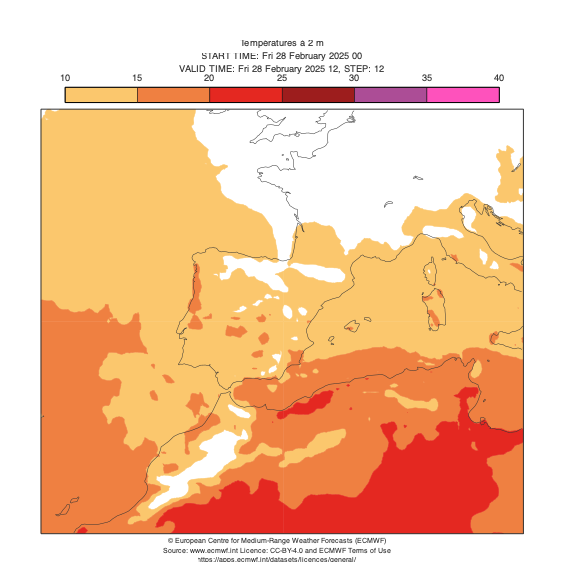

In [59]:
# define coastlines
coast = mv.mcoast(
    map_coastline_colour="charcoal",
    map_coastline_resolution="medium",
    map_coastline_land_shade="off",
    map_coastline_sea_shade="off",
    map_boundaries_colour= "charcoal",
    map_boundaries_thickness = 1,
    map_disputed_boundaries = "off",
    map_grid = 'off',
    map_boundaries = 'off',
    map_label = 'off'
)

# define view
view = mv.geoview(
    area_mode="name",
    area_name= zone_viz,
    coastlines=coast
)

#Automatic style
t2m_shade = mv.mcont(legend= "on",
                contour_automatics_settings = "style_name",
                contour_style_name = "sh_all_fM48t56i4")

#User defined style
echelle_couleurs_temp_EuropeC = ['#fcc86d','#f08041','#e52821','#9e1d1d','#ad4d97','#FF52BD']

t_contC = mv.mcont( 
    contour                        = "off",
    contour_level_selection_type   = "interval",
    contour_interval               = 5.00,
    contour_shade                  = "on",
    contour_shade_technique        = 'polygon_shading',
    contour_shade_method           = "area_fill",
    contour_shade_min_level        = 10,
    contour_shade_max_level        = 40,
    contour_shade_colour_method    = "list",
    contour_shade_colour_list      = echelle_couleurs_temp_EuropeC,
    contour_highlight              = "off",
    contour_label                  = "off",
    legend                         = "on",
)

# Title with start date/time, valid time and step
title = mv.mtext(
    text_lines = ["Températures à 2 m",
                "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=2t'/> ",
                "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=2t' />, STEP: <grib_info key='step' where='shortName=2t'/>"],
    text_font_size = 0.4,
    text_colour = 'charcoal')

ecmwf_text = mv.mtext(    
    text_lines          = ["© European Centre for Medium-Range Weather Forecasts (ECMWF)",
                           "Source: www.ecmwf.int Licence: CC-BY-4.0 and ECMWF Terms of Use",
                            "https://apps.ecmwf.int/datasets/licences/general/"],
    text_justification  = 'center',
    text_font_size      = 0.3,
    text_mode           = "positional",
    text_box_x_position = 7.,
    text_box_y_position = -0.2,
    text_box_x_length   = 8,
    text_box_y_length   = 2,
    text_colour         = 'charcoal')

#Legend
legend = mv.mlegend(
    legend_display_type   = 'continuous',
    legend_label_frequency = 1,
    legend_title = 'off',
    legend_text_font_size = 0.4,
    legend_text_colour = 'charcoal'
    )

# generate plot
mv.setoutput('jupyter', plot_widget=False)
mv.plot(view, t2m, t_contC, legend, title, ecmwf_text)

To get the start date, time and step you can use grib_get funciton

In [34]:
grib_keys = mv.grib_get(t2m, ['dataDate', 'dataTime', 'step'])

In [ ]:
baseDate = grib_keys[0][0]
baseHour = grib_keys[0][1]
dataStep = grib_keys[0][2]

## Save the svg file

In [60]:
infos_fichier = f'prev{baseDate}_{baseHour}hGMT_step{dataStep}h'

png = mv.svg_output(
      output_name = f'previsions_temp2m_{infos_fichier}{zone_viz}_sup10',   # specify relative or full path
      output_title = "medium-2t",    # title used by a viewer
      output_name_first_page_number = "off",
#      output_width = 1000,                 # set width in pixels
)
mv.setoutput(png)
mv.plot(view, t2m, t_contC, title, ecmwf_text)